<a href="https://colab.research.google.com/github/pinarrcindemirr/AI_Q1122408/blob/main/AI_Q1122408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leveraging Machine Learning Approaches for Lung Disease Diagnosis

Author: Q1122408-Pinar Cindemir

Course: Introduction to Artificial Intelligence

In [2]:
%%capture
import os

if not os.path.exists("AI_Q1122408"):
    !git clone https://github.com/pinarrcindemirr/AI_Q1122408.git

%cd AI_Q1122408

## DATA EXPLORATION

In [3]:
import pandas as pd

df = pd.read_csv("lung_disease_v1.csv")
df.head()

,patient_id,age,sex,bmi,smoking_status,pack_years,pm25_exposure,occupation,family_history,cough,...,dlco_pct_pred,cxr_finding,ct_nodule_size_mm,ct_emphysema_pct,sixmwd_m,hypertension,diabetes,hospital_visits_last_year,disease_type,severity
0,1,49,Male,20.1,Never,21.0,20.8,Office,NaN,1,...,82.1,Normal,3.0,11.9,447,1,1,0,Asthma,Moderate
1,2,61,Female,28.4,Current,34.1,10.8,Office,NaN,0,...,81.1,Normal,5.9,2.1,394,0,0,0,Lung Cancer,Mild/None
2,3,70,Male,22.2,Current,15.7,12.0,Manufacturing,NaN,1,...,85.4,Consolidation,2.8,4.8,309,0,1,0,Pneumonia,Mild/None
3,4,47,Male,23.1,Current,49.0,20.0,Manufacturing,NaN,0,...,49.0,Normal,1.8,29.4,190,0,0,0,COPD,Moderate
4,5,70,Female,29.0,Former,6.0,6.0,Office,NaN,0,...,81.6,Normal,1.0,9.5,314,0,0,0,Healthy,Mild/None


In [4]:
print(df.shape)
df.info()
df.dtypes
print(df.describe())

(12000, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 12000 non-null  int64  
 1   age                        12000 non-null  int64  
 2   sex                        12000 non-null  object 
 3   bmi                        12000 non-null  float64
 4   smoking_status             12000 non-null  object 
 5   pack_years                 12000 non-null  float64
 6   pm25_exposure              12000 non-null  float64
 7   occupation                 12000 non-null  object 
 8   family_history             4824 non-null   object 
 9   cough                      12000 non-null  int64  
 10  dyspnea                    12000 non-null  int64  
 11  wheeze                     12000 non-null  int64  
 12  chest_pain                 12000 non-null  int64  
 13  fever                      12000 n

In [5]:
X = df.drop(columns=['patient_id', 'severity','disease_type'])
y = df['disease_type']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (12000, 30)
y shape: (12000,)


disease_type
Healthy        4243
COPD           2147
Asthma         1968
Pneumonia      1861
Lung Cancer    1781
Name: count, dtype: int64
disease_type
Healthy        35.358333
COPD           17.891667
Asthma         16.400000
Pneumonia      15.508333
Lung Cancer    14.841667
Name: proportion, dtype: float64


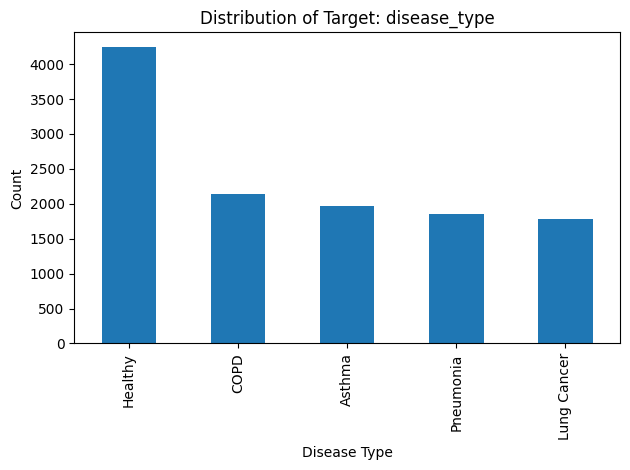

In [6]:
print(y.value_counts())

print(y.value_counts(normalize=True) * 100)

import matplotlib.pyplot as plt

y.value_counts().plot(kind='bar')
plt.title('Distribution of Target: disease_type')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [7]:
num_cols = X.select_dtypes(include='number').columns

stats = X[num_cols].agg(['mean', 'median', 'std']).T
print(stats.sort_values('std', ascending=False).head(10))

                         mean  median         std
sixmwd_m           403.809167   405.0  109.520138
crp_mg_L            20.793150    10.3   30.606319
fev1_pct_pred       83.805633    85.1   18.773718
dlco_pct_pred       81.511558    82.4   17.630906
pack_years          14.767758    10.3   14.848183
age                 58.070833    58.0   14.741634
fvc_pct_pred        94.915475    94.9   12.051371
ct_emphysema_pct     8.275508     6.3    8.290305
pm25_exposure       15.114308    15.0    6.689190
ct_nodule_size_mm    4.644267     3.0    5.926454


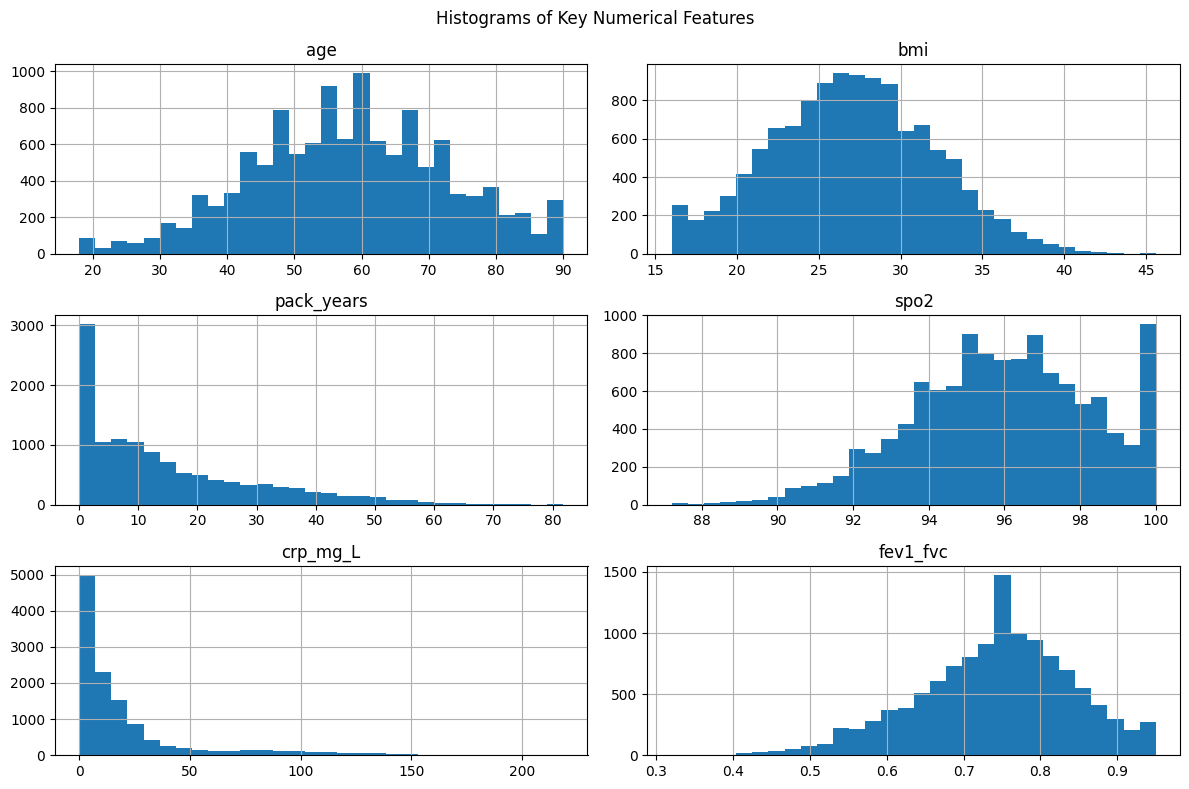

In [8]:
plot_cols = ['age','bmi','pack_years','spo2','crp_mg_L','fev1_fvc']
X[plot_cols].hist(bins=30, figsize=(12,8))
plt.suptitle('Histograms of Key Numerical Features')
plt.tight_layout()
plt.show()

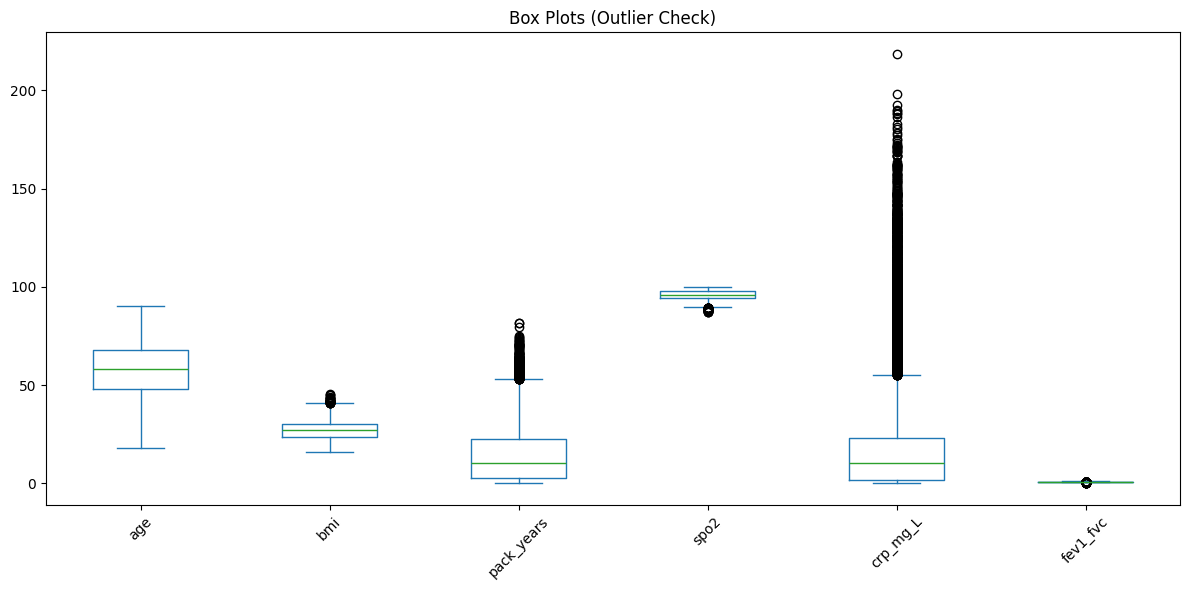

In [9]:
X[plot_cols].plot(kind='box', figsize=(12,6), rot=45)
plt.title('Box Plots (Outlier Check)')
plt.tight_layout()
plt.show()

In [10]:
skewness = X[num_cols].skew().sort_values(ascending=False)
print(skewness.head(10))

hemoptysis                   5.713612
ct_nodule_size_mm            2.506387
crp_mg_L                     2.400825
chest_pain                   2.098406
fever                        1.785862
ct_emphysema_pct             1.747442
diabetes                     1.629091
wheeze                       1.174994
pack_years                   1.159309
hospital_visits_last_year    1.133627
dtype: float64


                                age       bmi  pack_years  pm25_exposure  \
age                        1.000000 -0.005176   -0.001225      -0.008641   
bmi                       -0.005176  1.000000   -0.001965       0.009021   
pack_years                -0.001225 -0.001965    1.000000      -0.004871   
pm25_exposure             -0.008641  0.009021   -0.004871       1.000000   
cough                      0.000141 -0.005872    0.169777       0.027087   
dyspnea                    0.008634  0.002800    0.214945      -0.000341   
wheeze                    -0.003104  0.006927    0.061018       0.016585   
chest_pain                 0.006401  0.007061    0.070852      -0.008173   
fever                      0.011187  0.003609   -0.032096      -0.002484   
hemoptysis                -0.002904  0.013917    0.101389       0.005300   
weight_loss_kg            -0.020575  0.007052    0.266972      -0.013050   
spo2                       0.013780  0.004946   -0.000068      -0.008826   
respiratory_

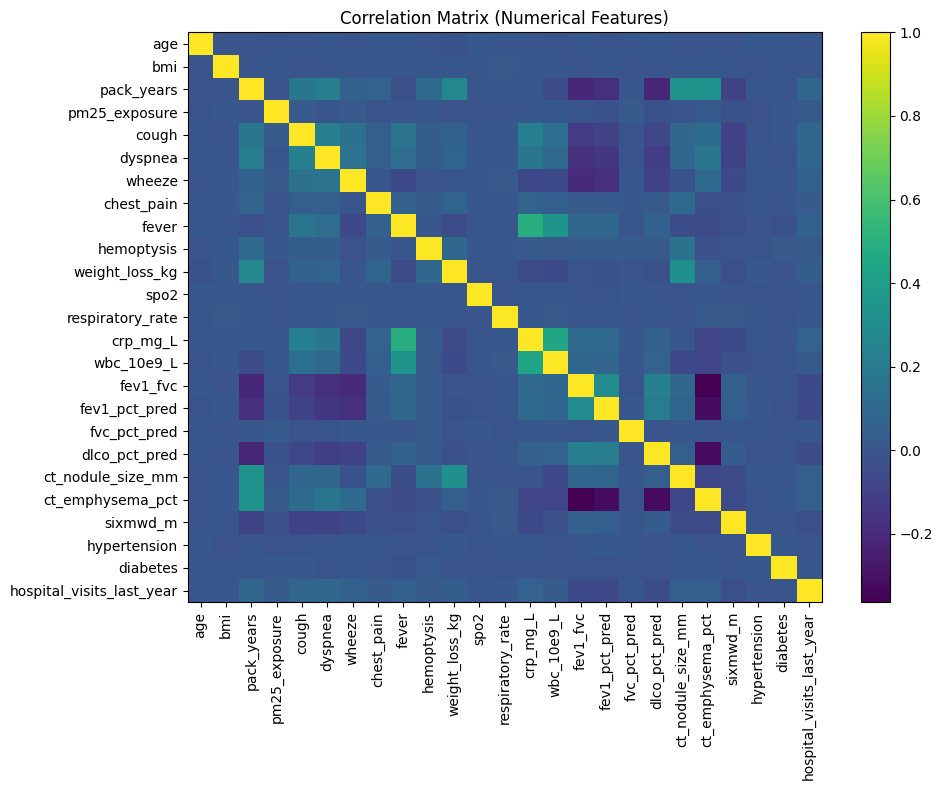

In [11]:
corr = X[num_cols].corr()
print(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix (Numerical Features)')
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

In [12]:
corr_df = pd.concat([X[num_cols], y], axis=1)

group_means = corr_df.groupby('disease_type')[num_cols].mean()
print(group_means)

                    age        bmi  pack_years  pm25_exposure     cough  \
disease_type                                                              
Asthma        58.216463  26.953506    6.231555      15.084654  0.551829   
COPD          57.821146  27.051653   30.008989      15.424406  0.589194   
Healthy       58.128683  26.964436    6.341386      15.022413  0.107471   
Lung Cancer   57.883212  26.985345   29.771982      14.867827  0.512633   
Pneumonia     58.252552  27.140193   11.063783      15.233315  0.692101   

               dyspnea    wheeze  chest_pain     fever  hemoptysis  ...  \
disease_type                                                        ...   
Asthma        0.519309  0.649898    0.110264  0.044207    0.012703  ...   
COPD          0.646483  0.395435    0.109455  0.089427    0.019562  ...   
Healthy       0.086024  0.050672    0.088852  0.050200    0.005892  ...   
Lung Cancer   0.498596  0.186974    0.259405  0.104436    0.109489  ...   
Pneumonia     0.593229  

In [13]:
separation_score = (group_means.max() - group_means.min()).sort_values(ascending=False)

print("Top 10 features linked to categories:")
print(separation_score.head(10))

Top 10 features linked to categories:
crp_mg_L             70.369986
sixmwd_m             40.212701
fev1_pct_pred        24.794567
pack_years           23.777434
dlco_pct_pred        20.971137
ct_emphysema_pct     15.579117
ct_nodule_size_mm    12.967391
wbc_10e9_L            4.048267
weight_loss_kg        3.079657
fever                 0.668313
dtype: float64


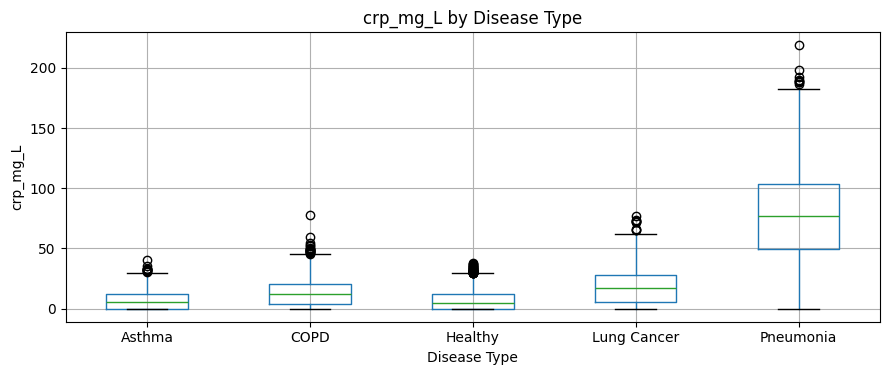

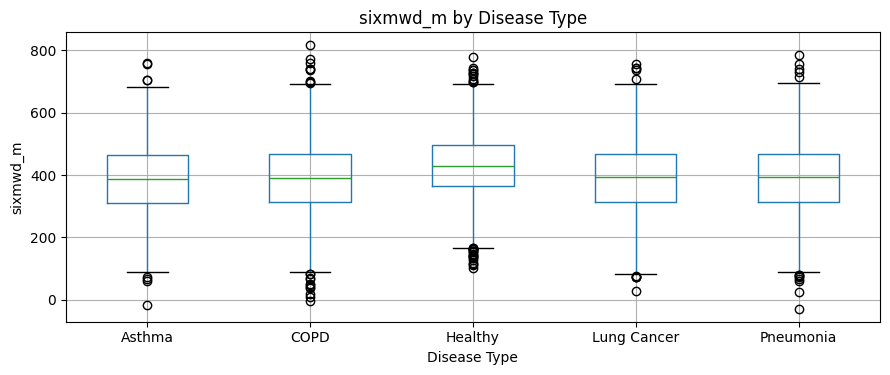

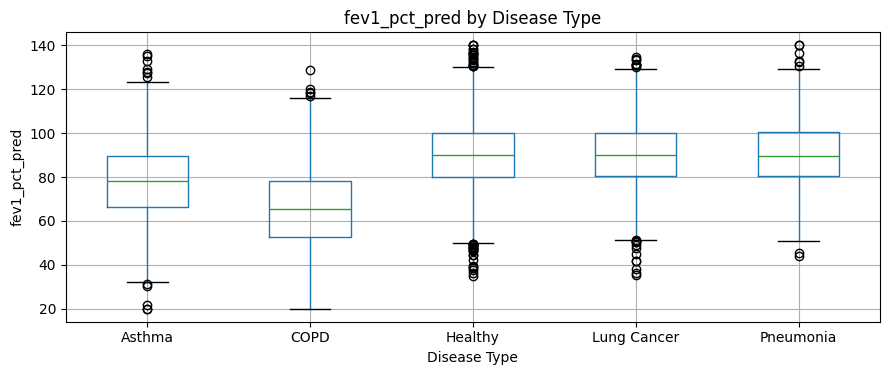

In [14]:
top_features = separation_score.head(3).index.tolist()

for col in top_features:
    corr_df.boxplot(column=col, by='disease_type', figsize=(9,4))
    plt.title(f'{col} by Disease Type')
    plt.suptitle('')
    plt.xlabel('Disease Type')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# PREPROCESSING

* Missing value handling






In [15]:
print(X.isnull().sum())
print(X.isnull().sum() / len(X) * 100)

age                             0
sex                             0
bmi                             0
smoking_status                  0
pack_years                      0
pm25_exposure                   0
occupation                      0
family_history               7176
cough                           0
dyspnea                         0
wheeze                          0
chest_pain                      0
fever                           0
hemoptysis                      0
weight_loss_kg                  0
spo2                            0
respiratory_rate                0
crp_mg_L                        0
wbc_10e9_L                      0
fev1_fvc                        0
fev1_pct_pred                   0
fvc_pct_pred                    0
dlco_pct_pred                   0
cxr_finding                     0
ct_nodule_size_mm               0
ct_emphysema_pct                0
sixmwd_m                        0
hypertension                    0
diabetes                        0
hospital_visit

In [16]:
X = X.drop(columns=['family_history'])

In [17]:
print("Shape after dropping family_history:", X.shape)
print("Total missing values after handling:", X.isnull().sum().sum())

Shape after dropping family_history: (12000, 29)
Total missing values after handling: 0


* One-Hot Encoding

In [18]:
categorical_cols = X.select_dtypes(include='object').columns

# One-Hot Encoding
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

print("Before encoding shape:", X.shape)
print("After encoding shape:", X_encoded.shape)

Before encoding shape: (12000, 29)
After encoding shape: (12000, 41)


* Train–Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

* StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include='number').columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols]  = scaler.transform(X_test[num_cols])

print("\nBefore scaling (train) mean/std:")
print(X_train[num_cols].describe().loc[['mean', 'std']])

print("\nAfter scaling (train) mean/std:")
print(X_train_scaled[num_cols].describe().loc[['mean', 'std']])



Before scaling (train) mean/std:
            age        bmi  pack_years  pm25_exposure     cough   dyspnea  \
mean  58.014271  27.034635   14.803042      15.098281  0.416875  0.395000   
std   14.756844   4.972086   14.817443       6.725647  0.493067  0.488876   

        wheeze  chest_pain     fever  hemoptysis  ...  fev1_fvc  \
mean  0.246771    0.135937  0.166250    0.026875  ...  0.741478   
std   0.431155    0.342740  0.372324    0.161726  ...  0.100554   

      fev1_pct_pred  fvc_pct_pred  dlco_pct_pred  ct_nodule_size_mm  \
mean      83.853156     94.865042      81.603542           4.650625   
std       18.823739     12.063556      17.649290           5.908386   

      ct_emphysema_pct    sixmwd_m  hypertension  diabetes  \
mean          8.328021  404.488958      0.346667  0.181875   
std           8.287538  109.782283      0.475933  0.385762   

      hospital_visits_last_year  
mean                   0.612083  
std                    0.737955  

[2 rows x 25 columns]

After

# MODEL TRAINING

* Logistic Regression


Logistic Regression Accuracy: 0.9379166666666666

Classification Report:
               precision    recall  f1-score   support

      Asthma       0.86      0.81      0.84       394
        COPD       0.98      0.96      0.97       429
     Healthy       0.91      0.95      0.93       849
 Lung Cancer       0.98      0.97      0.98       356
   Pneumonia       0.98      0.99      0.98       372

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



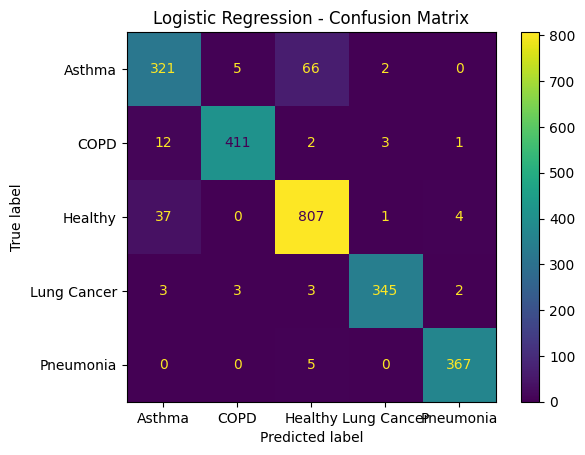

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

* Support Vector Machine (SVM)

SVM Accuracy:
0.9341666666666667

SVM Classification Report:
              precision    recall  f1-score   support

      Asthma       0.84      0.81      0.82       394
        COPD       0.98      0.95      0.96       429
     Healthy       0.91      0.96      0.94       849
 Lung Cancer       0.99      0.95      0.97       356
   Pneumonia       0.99      0.98      0.99       372

    accuracy                           0.93      2400
   macro avg       0.94      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



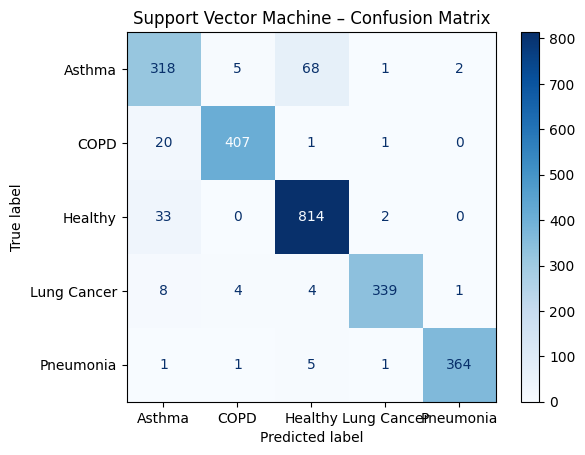

In [26]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:")
print(accuracy_score(y_test, y_pred_svm))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    svm_model,
    X_test_scaled,
    y_test,
    cmap='Blues'
)

plt.title("Support Vector Machine – Confusion Matrix")
plt.show()


* Decision Tree

Decision Tree Accuracy:
0.88

Decision Tree Classification Report:
              precision    recall  f1-score   support

      Asthma       0.69      0.76      0.72       394
        COPD       0.96      0.90      0.93       429
     Healthy       0.88      0.87      0.88       849
 Lung Cancer       0.93      0.94      0.93       356
   Pneumonia       0.96      0.96      0.96       372

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



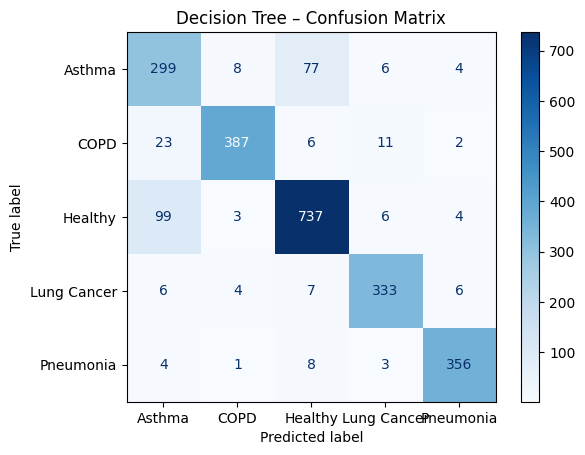

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:")
print(accuracy_score(y_test, y_pred_dt))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_estimator(
    dt_model,
    X_test_scaled,
    y_test,
    cmap='Blues'
)

plt.title("Decision Tree – Confusion Matrix")
plt.show()

* Random Forest

Random Forest Accuracy:
0.9345833333333333

Random Forest Classification Report:
              precision    recall  f1-score   support

      Asthma       0.84      0.80      0.82       394
        COPD       0.99      0.96      0.97       429
     Healthy       0.91      0.95      0.93       849
 Lung Cancer       0.97      0.97      0.97       356
   Pneumonia       0.99      0.99      0.99       372

    accuracy                           0.93      2400
   macro avg       0.94      0.93      0.94      2400
weighted avg       0.93      0.93      0.93      2400



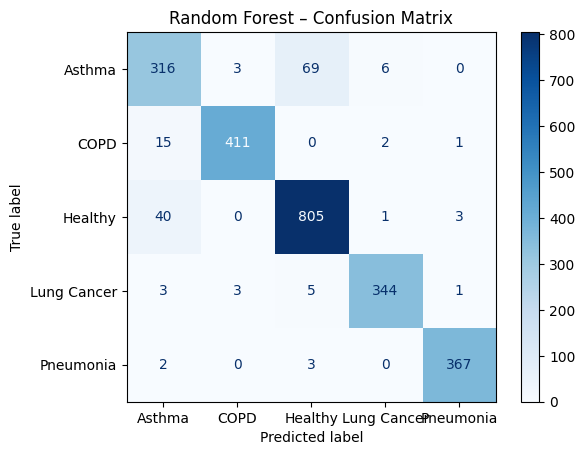

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:")
print(accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test_scaled,
    y_test,
    cmap='Blues'
)
plt.title("Random Forest – Confusion Matrix")
plt.show()

* K-Nearest Neighbors (KNN)

KNN Accuracy:
0.86375

KNN Classification Report:
              precision    recall  f1-score   support

      Asthma       0.71      0.69      0.70       394
        COPD       0.96      0.83      0.89       429
     Healthy       0.81      0.96      0.88       849
 Lung Cancer       0.98      0.80      0.88       356
   Pneumonia       0.98      0.91      0.94       372

    accuracy                           0.86      2400
   macro avg       0.89      0.84      0.86      2400
weighted avg       0.87      0.86      0.86      2400



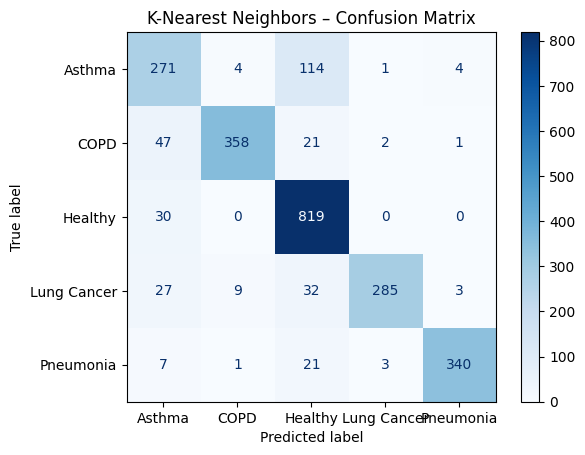

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=5
)

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN Accuracy:")
print(accuracy_score(y_test, y_pred_knn))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X_test_scaled,
    y_test,
    cmap='Blues'
)
plt.title("K-Nearest Neighbors – Confusion Matrix")
plt.show()